In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
Data = "http://bit.ly/w-data"
df = pd.read_csv(Data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.shape

(25, 2)

In [5]:
df.size

50

In [6]:
#checking the missing value:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


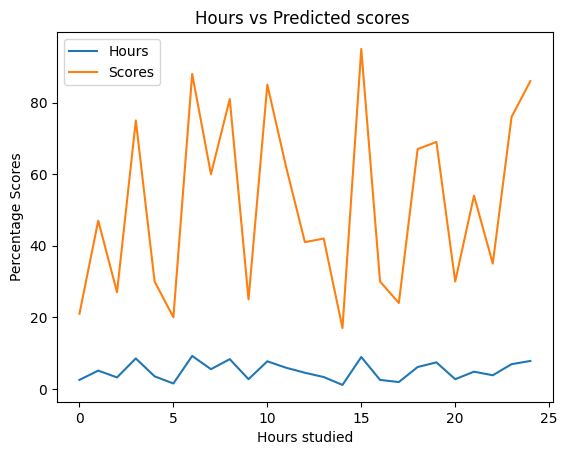

In [9]:
df.plot(kind = 'line')
plt.title("Hours vs Predicted scores ")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scores")
plt.show()

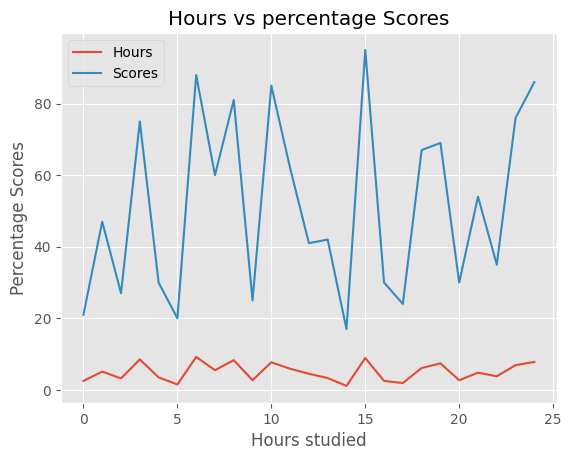

In [10]:
style.use('ggplot')
df.plot(kind='line')
plt.title("Hours vs percentage Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scores")
plt.show()

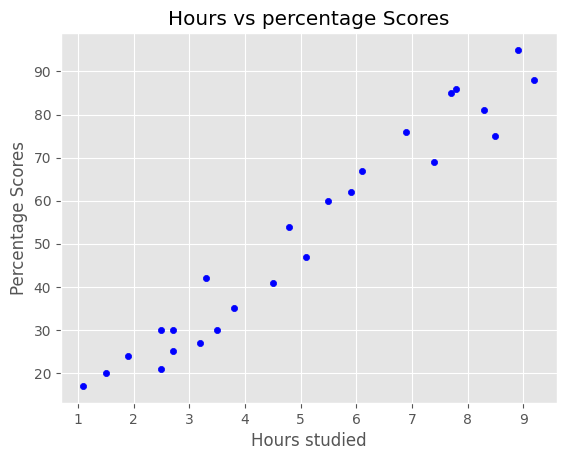

In [11]:
df.plot(kind= 'scatter' , x='Hours', y='Scores', c='b')
plt.title("Hours vs percentage Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scores")
plt.show()

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =42) 

print("shape of x train" , x_train.shape)
print("shape of y test" , y_train.shape)
print("shape of y train" , x_test.shape)
print("shape of y test" , y_test.shape)

shape of x train (20, 1)
shape of y test (20,)
shape of y train (5, 1)
shape of y test (5,)


In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
m=lr.coef_
m

array([9.68207815])

In [16]:
c=lr.intercept_
c

2.826892353899737

In [17]:
y_pred=lr.predict(x_test)

In [18]:
#comparison in between actual and predicted
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


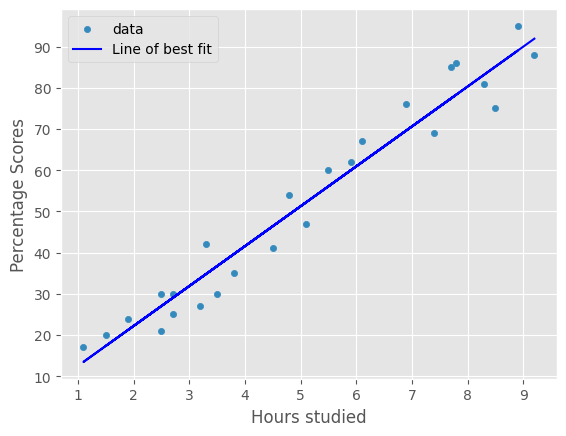

In [19]:
#visualizing the regression:
df.plot(kind= 'scatter' , x='Hours', y='Scores', label='data')
plt.plot(x_train,m*x_train+c,c='b',label='Line of best fit')
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scores")
plt.legend()
plt.show()

In [20]:
#using metrics to find the mean absolute error & r2 to see the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
print("Accuracy: %.2f" %r2_score(y_test,y_pred))
print('Mean Absolute Error : ', format(metrics.mean_absolute_error(y_test,y_pred)))

Accuracy: 0.97
Mean Absolute Error :  3.9207511902099244


In [21]:
hours=9.25
own_pred=own_pred=lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/day is",own_pred[0])

The predicted score if a student studies for 9.25 hrs/day is 92.38611528261494


In [23]:
hours=float(input())
own_pred=lr.predict([[hours]])
print("No of hours = {}". format(hours))
print("Predicted Score = {}". format(own_pred[0]))

 8


No of hours = 8.0
Predicted Score = 80.28351758954531
